In [1]:
import pandas as pd
import numpy as np

import zipfile as zf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss,confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score
import joblib
from sklearn import set_config
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier,RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
unz=zf.ZipFile('/content/Inceptez_hackathon.zip')

In [3]:
unz.extractall()

In [4]:
train=pd.read_csv('/content/train_loan_data.csv')
train

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-1997,10+ years,Deputy,744.0,740.0,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338.0,93.6,E1,60 months,Debt consolidation,8.0,Source Verified,Charged Off
1,CA,40000.0,Apr-1987,10+ years,Department of Veterans Affairs,724.0,720.0,B,RENT,Individual,...,0.0,debt_consolidation,19944.0,60.3,B1,36 months,Credit Loan,12.0,Verified,Fully Paid
2,FL,60000.0,Aug-2007,10+ years,Marble polishing,679.0,675.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199.0,88.5,B5,36 months,Debt consolidation,16.0,Source Verified,Fully Paid
3,IL,100742.0,Sep-1980,10+ years,printer,664.0,660.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425.0,69.0,B2,36 months,Debt consolidation,19.0,Source Verified,Fully Paid
4,MD,80000.0,Jul-1999,10+ years,Southern Mgmt,669.0,665.0,F,RENT,Individual,...,0.0,debt_consolidation,34370.0,90.0,F5,60 months,Debt Connsolidation,59.0,Verified,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,SC,81000.0,Feb-2000,10+ years,Sports Group Manager,664.0,660.0,G,MORTGAGE,Individual,...,0.0,debt_consolidation,20201.0,93.5,G3,60 months,Debt consolidation,42.0,Verified,Charged Off
79996,NH,45000.0,Aug-1995,10+ years,Web Designer,684.0,680.0,C,MORTGAGE,Individual,...,0.0,debt_consolidation,6145.0,56.9,C1,36 months,Debt consolidation,14.0,Not Verified,Fully Paid
79997,NY,90000.0,Apr-2005,< 1 year,Program Officer,724.0,720.0,B,OWN,Individual,...,0.0,debt_consolidation,3910.0,25.6,B4,36 months,Debt consolidation,26.0,Source Verified,Fully Paid
79998,TX,94000.0,Apr-1992,3 years,Sr. Business Analyst,669.0,665.0,D,MORTGAGE,Individual,...,1.0,credit_card,11897.0,49.4,D5,60 months,Credit card refinancing,48.0,Source Verified,Fully Paid


In [5]:
test=pd.read_csv('/content/test_loan_data.csv')
test

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,MO,50000.0,May-2012,1 year,Tower technician,719.0,715.0,C,OWN,Individual,...,0.0,0.0,debt_consolidation,2568.0,9.8,C4,36 months,Debt consolidation,11.0,Source Verified
1,HI,92000.0,Dec-2001,10+ years,Supervisor,684.0,680.0,B,RENT,Individual,...,0.0,0.0,debt_consolidation,30394.0,75.4,B2,36 months,Debt consolidation,35.0,Source Verified
2,TX,89000.0,Mar-1989,10+ years,APPLICATIONS PROGRAMMER,679.0,675.0,B,MORTGAGE,Individual,...,0.0,0.0,credit_card,38400.0,75.3,B2,60 months,Credit card refinancing,41.0,Not Verified
3,CA,33000.0,Nov-2004,9 years,San Diego Unified School District,674.0,670.0,C,RENT,Individual,...,1.0,1.0,debt_consolidation,21224.0,69.4,C1,36 months,Breathing Room,16.0,Not Verified
4,MI,35580.0,Feb-1997,NaN,NaN,704.0,700.0,B,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,3471.0,39.4,B5,36 months,debitconsolidation,19.0,Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,MO,38500.0,Sep-2010,4 years,lighting coordinator,679.0,675.0,D,RENT,Individual,...,0.0,0.0,debt_consolidation,5816.0,60.0,D4,36 months,Debt consolidation,10.0,Not Verified
19996,VA,80000.0,Dec-1998,3 years,Contract & Compliance Manager,674.0,670.0,D,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,13886.0,75.1,D4,60 months,Debt consolidation,30.0,Source Verified
19997,TX,95000.0,May-1996,10+ years,Pharmacist,729.0,725.0,B,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,43166.0,60.7,B5,36 months,Debt consolidation,29.0,Source Verified
19998,FL,35000.0,Mar-2003,10+ years,Manager In Training,809.0,805.0,A,MORTGAGE,Individual,...,0.0,0.0,car,1110.0,4.4,A5,36 months,Car financing,19.0,Not Verified


checking and handling the null values and duplicates

In [6]:
train.duplicated().sum()

0

In [7]:
train.isna().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

In [8]:
train[train['title'].isna()] ## the null values are present in the same row for each column

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
8,FL,59292.0,Dec-2007,NaN,NaN,664.0,660.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,1054.0,23.4,B4,36 months,NaN,23.0,Verified,Fully Paid
22,MI,72000.0,Jan-1998,10+ years,Inspector,684.0,680.0,B,RENT,Individual,...,0.0,debt_consolidation,14438.0,59.0,B5,36 months,NaN,26.0,Verified,Charged Off
48,NY,80000.0,May-2003,3 years,Sales Rep,719.0,715.0,B,RENT,Individual,...,0.0,debt_consolidation,5568.0,19.5,B5,36 months,NaN,18.0,Source Verified,Fully Paid
56,CA,90000.0,Jun-2000,6 years,Value Stream Manager,749.0,745.0,A,RENT,Individual,...,0.0,debt_consolidation,14011.0,39.9,A1,36 months,NaN,24.0,Not Verified,Fully Paid
153,OH,75000.0,Jul-2004,5 years,Machinist,709.0,705.0,B,RENT,Individual,...,1.0,debt_consolidation,4671.0,18.5,B2,36 months,NaN,23.0,Source Verified,Charged Off
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79371,IL,65000.0,Nov-2011,1 year,Field Service Engineer,674.0,670.0,D,RENT,Individual,...,0.0,other,1077.0,18.3,D1,36 months,NaN,19.0,Source Verified,Charged Off
79486,GA,55000.0,Jan-2001,3 years,Intern Pharmacist,664.0,660.0,D,RENT,Individual,...,0.0,debt_consolidation,20437.0,56.8,D3,36 months,NaN,34.0,Source Verified,Fully Paid
79535,IL,25000.0,Jun-2006,2 years,Sole Proprietor,699.0,695.0,C,RENT,Individual,...,0.0,debt_consolidation,3383.0,42.3,C3,36 months,NaN,26.0,Source Verified,Charged Off
79635,CA,160000.0,Oct-1995,10+ years,Owner/Lead Acupuncturist,679.0,675.0,A,RENT,Individual,...,0.0,debt_consolidation,4982.0,99.6,A5,36 months,NaN,17.0,Source Verified,Charged Off


In [9]:
train[train['emp_title'].isna()] ## the null values are present in the same row for each column

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
5,CA,51488.0,May-1991,NaN,NaN,679.0,675.0,D,MORTGAGE,Individual,...,0.0,home_improvement,10747.0,53.9,D3,36 months,Home improvement,37.0,Verified,Fully Paid
8,FL,59292.0,Dec-2007,NaN,NaN,664.0,660.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,1054.0,23.4,B4,36 months,NaN,23.0,Verified,Fully Paid
16,AL,52512.0,Apr-2004,NaN,NaN,684.0,680.0,C,MORTGAGE,Individual,...,1.0,other,3575.0,16.8,C3,36 months,Other,36.0,Verified,Fully Paid
18,AR,100000.0,Sep-1993,NaN,NaN,744.0,740.0,B,MORTGAGE,Individual,...,0.0,home_improvement,8879.0,48.0,B1,36 months,Home improvement,21.0,Source Verified,Charged Off
49,FL,78000.0,Jul-2003,NaN,NaN,754.0,750.0,A,RENT,Individual,...,0.0,debt_consolidation,12137.0,33.1,A4,36 months,Debt consolidation,22.0,Not Verified,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79910,MI,28000.0,Dec-1995,NaN,NaN,699.0,695.0,D,RENT,Individual,...,0.0,debt_consolidation,20577.0,97.5,D4,36 months,Debt consolidation,18.0,Verified,Charged Off
79929,AZ,26256.0,Mar-1998,NaN,NaN,694.0,690.0,C,OWN,Individual,...,0.0,vacation,6919.0,19.0,C4,36 months,Vacation,31.0,Verified,Charged Off
79948,MI,100000.0,Jun-1996,NaN,NaN,669.0,665.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,26084.0,89.3,B1,36 months,Debt consolidation,33.0,Source Verified,Fully Paid
79954,OR,31000.0,Sep-1992,NaN,NaN,689.0,685.0,C,RENT,Individual,...,0.0,debt_consolidation,24021.0,67.5,C2,36 months,Debt consolidation,19.0,Verified,Fully Paid


In [10]:
train=train.dropna()

In [11]:
train.isna().sum()

addr_state              0
annual_inc              0
earliest_cr_line        0
emp_length              0
emp_title               0
fico_range_high         0
fico_range_low          0
grade                   0
home_ownership          0
application_type        0
initial_list_status     0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
purpose                 0
revol_bal               0
revol_util              0
sub_grade               0
term                    0
title                   0
total_acc               0
verification_status     0
loan_status             0
dtype: int64

In [12]:
train.shape

(70375, 28)

In [13]:
train.columns.difference(test.columns)

Index(['loan_status'], dtype='object')

In [14]:
# to find the column difference between train and test
train.nunique(),test.nunique()

(addr_state                 50
 annual_inc               6019
 earliest_cr_line          614
 emp_length                 11
 emp_title               33202
 fico_range_high            38
 fico_range_low             38
 grade                       7
 home_ownership              6
 application_type            2
 initial_list_status         2
 int_rate                  351
 loan_amnt                1362
 num_actv_bc_tl             28
 mort_acc                   27
 tot_cur_bal             61412
 open_acc                   56
 pub_rec                    14
 pub_rec_bankruptcies        8
 purpose                    13
 revol_bal               31441
 revol_util               1077
 sub_grade                  35
 term                        2
 title                    3422
 total_acc                 106
 verification_status         3
 loan_status                 2
 dtype: int64,
 addr_state                 50
 annual_inc               2591
 earliest_cr_line          568
 emp_length             

In [15]:
train.duplicated().sum(), test.duplicated().sum()

(0, 0)

In [16]:
train.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status'],
      dtype='object')

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70375 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            70375 non-null  object 
 1   annual_inc            70375 non-null  float64
 2   earliest_cr_line      70375 non-null  object 
 3   emp_length            70375 non-null  object 
 4   emp_title             70375 non-null  object 
 5   fico_range_high       70375 non-null  float64
 6   fico_range_low        70375 non-null  float64
 7   grade                 70375 non-null  object 
 8   home_ownership        70375 non-null  object 
 9   application_type      70375 non-null  object 
 10  initial_list_status   70375 non-null  object 
 11  int_rate              70375 non-null  float64
 12  loan_amnt             70375 non-null  float64
 13  num_actv_bc_tl        70375 non-null  float64
 14  mort_acc              70375 non-null  float64
 15  tot_cur_bal        

# text error correction and checking the unique parts for each column in train dataset

In [18]:
train['earliest_cr_line'].unique()

array(['Jul-1997', 'Apr-1987', 'Aug-2007', 'Sep-1980', 'Jul-1999',
       'Oct-1986', 'Jun-2004', 'Aug-1996', 'Oct-1998', 'May-2007',
       'Oct-2000', 'Jan-2005', 'Sep-2000', 'Oct-2001', 'May-2001',
       'Jun-2006', 'Jan-1999', 'Jul-1998', 'Jun-2003', 'Jul-2009',
       'Nov-2006', 'Feb-2006', 'Aug-2010', 'Apr-2001', 'Dec-2002',
       'Jun-1978', 'Oct-2004', 'Feb-2004', 'Sep-2006', 'May-1999',
       'Jan-1988', 'Mar-1992', 'Jun-2011', 'Feb-1995', 'Dec-2005',
       'Nov-1997', 'Sep-2003', 'Feb-1991', 'Dec-2000', 'Nov-1990',
       'Oct-1996', 'Nov-2003', 'Nov-1993', 'Jun-2005', 'Aug-1987',
       'Dec-2008', 'Sep-1995', 'Feb-1981', 'Aug-1993', 'Jan-2004',
       'Dec-2006', 'May-2005', 'Jun-1995', 'Sep-1986', 'Aug-1991',
       'Aug-2000', 'Mar-2009', 'Aug-2004', 'Jan-2002', 'Aug-2008',
       'Oct-2006', 'Mar-2005', 'Apr-2004', 'Apr-1982', 'Feb-1994',
       'Oct-2005', 'Jun-1983', 'Oct-1988', 'Mar-1998', 'Jul-2002',
       'Oct-2003', 'Mar-1995', 'Aug-1999', 'Oct-2009', 'Oct-19

In [19]:
train['earliest_cr_line'].apply(lambda x:x.split('-')[0])

0        Jul
1        Apr
2        Aug
3        Sep
4        Jul
        ... 
79995    Feb
79996    Aug
79997    Apr
79998    Apr
79999    Jun
Name: earliest_cr_line, Length: 70375, dtype: object

In [20]:
train['earliest_crline_months']=train['earliest_cr_line'].apply(lambda x:x.split('-')[0])

In [21]:
train

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status,earliest_crline_months
0,CO,85000.0,Jul-1997,10+ years,Deputy,744.0,740.0,E,MORTGAGE,Individual,...,debt_consolidation,5338.0,93.6,E1,60 months,Debt consolidation,8.0,Source Verified,Charged Off,Jul
1,CA,40000.0,Apr-1987,10+ years,Department of Veterans Affairs,724.0,720.0,B,RENT,Individual,...,debt_consolidation,19944.0,60.3,B1,36 months,Credit Loan,12.0,Verified,Fully Paid,Apr
2,FL,60000.0,Aug-2007,10+ years,Marble polishing,679.0,675.0,B,MORTGAGE,Individual,...,debt_consolidation,23199.0,88.5,B5,36 months,Debt consolidation,16.0,Source Verified,Fully Paid,Aug
3,IL,100742.0,Sep-1980,10+ years,printer,664.0,660.0,B,MORTGAGE,Individual,...,debt_consolidation,18425.0,69.0,B2,36 months,Debt consolidation,19.0,Source Verified,Fully Paid,Sep
4,MD,80000.0,Jul-1999,10+ years,Southern Mgmt,669.0,665.0,F,RENT,Individual,...,debt_consolidation,34370.0,90.0,F5,60 months,Debt Connsolidation,59.0,Verified,Fully Paid,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,SC,81000.0,Feb-2000,10+ years,Sports Group Manager,664.0,660.0,G,MORTGAGE,Individual,...,debt_consolidation,20201.0,93.5,G3,60 months,Debt consolidation,42.0,Verified,Charged Off,Feb
79996,NH,45000.0,Aug-1995,10+ years,Web Designer,684.0,680.0,C,MORTGAGE,Individual,...,debt_consolidation,6145.0,56.9,C1,36 months,Debt consolidation,14.0,Not Verified,Fully Paid,Aug
79997,NY,90000.0,Apr-2005,< 1 year,Program Officer,724.0,720.0,B,OWN,Individual,...,debt_consolidation,3910.0,25.6,B4,36 months,Debt consolidation,26.0,Source Verified,Fully Paid,Apr
79998,TX,94000.0,Apr-1992,3 years,Sr. Business Analyst,669.0,665.0,D,MORTGAGE,Individual,...,credit_card,11897.0,49.4,D5,60 months,Credit card refinancing,48.0,Source Verified,Fully Paid,Apr


In [22]:
train['earliest_crline_months'].unique()

array(['Jul', 'Apr', 'Aug', 'Sep', 'Oct', 'Jun', 'May', 'Jan', 'Nov',
       'Feb', 'Dec', 'Mar'], dtype=object)

In [23]:
train['earliest_cr_line'].apply(lambda x:x.split('-')[1])

0        1997
1        1987
2        2007
3        1980
4        1999
         ... 
79995    2000
79996    1995
79997    2005
79998    1992
79999    1999
Name: earliest_cr_line, Length: 70375, dtype: object

In [24]:
train['earliest_crline_year']=train['earliest_cr_line'].apply(lambda x:x.split('-')[1])

In [25]:
train

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status,earliest_crline_months,earliest_crline_year
0,CO,85000.0,Jul-1997,10+ years,Deputy,744.0,740.0,E,MORTGAGE,Individual,...,5338.0,93.6,E1,60 months,Debt consolidation,8.0,Source Verified,Charged Off,Jul,1997
1,CA,40000.0,Apr-1987,10+ years,Department of Veterans Affairs,724.0,720.0,B,RENT,Individual,...,19944.0,60.3,B1,36 months,Credit Loan,12.0,Verified,Fully Paid,Apr,1987
2,FL,60000.0,Aug-2007,10+ years,Marble polishing,679.0,675.0,B,MORTGAGE,Individual,...,23199.0,88.5,B5,36 months,Debt consolidation,16.0,Source Verified,Fully Paid,Aug,2007
3,IL,100742.0,Sep-1980,10+ years,printer,664.0,660.0,B,MORTGAGE,Individual,...,18425.0,69.0,B2,36 months,Debt consolidation,19.0,Source Verified,Fully Paid,Sep,1980
4,MD,80000.0,Jul-1999,10+ years,Southern Mgmt,669.0,665.0,F,RENT,Individual,...,34370.0,90.0,F5,60 months,Debt Connsolidation,59.0,Verified,Fully Paid,Jul,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,SC,81000.0,Feb-2000,10+ years,Sports Group Manager,664.0,660.0,G,MORTGAGE,Individual,...,20201.0,93.5,G3,60 months,Debt consolidation,42.0,Verified,Charged Off,Feb,2000
79996,NH,45000.0,Aug-1995,10+ years,Web Designer,684.0,680.0,C,MORTGAGE,Individual,...,6145.0,56.9,C1,36 months,Debt consolidation,14.0,Not Verified,Fully Paid,Aug,1995
79997,NY,90000.0,Apr-2005,< 1 year,Program Officer,724.0,720.0,B,OWN,Individual,...,3910.0,25.6,B4,36 months,Debt consolidation,26.0,Source Verified,Fully Paid,Apr,2005
79998,TX,94000.0,Apr-1992,3 years,Sr. Business Analyst,669.0,665.0,D,MORTGAGE,Individual,...,11897.0,49.4,D5,60 months,Credit card refinancing,48.0,Source Verified,Fully Paid,Apr,1992


In [26]:
train['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [27]:
train['term'].apply(lambda x:x.split()[0])

0        60
1        36
2        36
3        36
4        60
         ..
79995    60
79996    36
79997    36
79998    60
79999    36
Name: term, Length: 70375, dtype: object

In [28]:
train['term_months']=train['term'].apply(lambda x:x.split()[0])

In [29]:
train.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status', 'earliest_crline_months', 'earliest_crline_year',
       'term_months'],
      dtype='object')

In [30]:
train['grade'].unique()

array(['E', 'B', 'F', 'C', 'D', 'A', 'G'], dtype=object)

In [31]:
train=train.drop(columns=['term','earliest_cr_line','sub_grade'])

In [32]:
train.shape

(70375, 28)

In [33]:
train['verification_status'].unique()

array(['Source Verified', 'Verified', 'Not Verified'], dtype=object)

In [34]:
train['verification_status']=train['verification_status'].replace({'Source Verified':'Verified'})

In [35]:
train['verification_status'].unique()

array(['Verified', 'Not Verified'], dtype=object)

In [36]:
train['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '8 years', '7 years', '4 years',
       '2 years', '3 years', '5 years', '6 years', '9 years'],
      dtype=object)

In [37]:
train['emp_length']=train['emp_length'].replace({'10+ years':10,'< 1 year':0,'1 year':1,'8 years':8,'7 years':7
                                                 , '4 years':4,'2 years':2
                                                 , '3 years':3
                                                 , '5 years':5
                                                 , '6 years':6
                                                 , '9 years':9
                                                })

In [38]:
train['emp_length'].unique()

array([10,  0,  1,  8,  7,  4,  2,  3,  5,  6,  9])

In [39]:
train['emp_length_yrs']=train['emp_length']

In [40]:
train=train.drop(columns='emp_length')

In [41]:
train['pub_rec']=train['pub_rec'].astype('int')

In [42]:
train['pub_rec_bankruptcies']=train['pub_rec_bankruptcies'].astype('int')

In [43]:
train['fico_range_high']=train['fico_range_high'].astype('int')

In [44]:
train['fico_range_low']=train['fico_range_low'].astype('int')

In [45]:
train['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [46]:
train['home_ownership']=train['home_ownership'].replace({'ANY':'OTHER','NONE':'OTHER'})

In [47]:
train['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER'], dtype=object)

In [48]:
train['mort_acc']=train['mort_acc'].astype('int')

In [49]:
train['tot_cur_bal']=train['tot_cur_bal'].astype('int')

In [50]:
train['total_acc']=train['total_acc'].astype('int')

In [51]:
train['num_actv_bc_tl']=train['num_actv_bc_tl'].astype('int')

In [52]:
train['term_months']=train['term_months'].astype('int')

In [53]:
train['open_acc']=train['open_acc'].astype('int')

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70375 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   addr_state              70375 non-null  object 
 1   annual_inc              70375 non-null  float64
 2   emp_title               70375 non-null  object 
 3   fico_range_high         70375 non-null  int64  
 4   fico_range_low          70375 non-null  int64  
 5   grade                   70375 non-null  object 
 6   home_ownership          70375 non-null  object 
 7   application_type        70375 non-null  object 
 8   initial_list_status     70375 non-null  object 
 9   int_rate                70375 non-null  float64
 10  loan_amnt               70375 non-null  float64
 11  num_actv_bc_tl          70375 non-null  int64  
 12  mort_acc                70375 non-null  int64  
 13  tot_cur_bal             70375 non-null  int64  
 14  open_acc                70375 non-null

classification or grouping of fico range:
801-900 : 'A-FR'
701-800 : 'B-FR'
601-700 : 'C-FR'

In [55]:
train['fico_range_high'].unique()

array([744, 724, 679, 664, 669, 699, 684, 749, 694, 674, 729, 689, 719,
       709, 734, 739, 714, 704, 774, 789, 764, 784, 779, 799, 809, 759,
       804, 754, 794, 769, 834, 839, 814, 824, 819, 829, 850, 844])

In [56]:
train['fico_range_low'].unique()

array([740, 720, 675, 660, 665, 695, 680, 745, 690, 670, 725, 685, 715,
       705, 730, 735, 710, 700, 770, 785, 760, 780, 775, 795, 805, 755,
       800, 750, 790, 765, 830, 835, 810, 820, 815, 825, 845, 840])

In [57]:
train['fico_range_high']=train['fico_range_high'].replace({744:'B-FR', 724:'B-FR', 679:'C-FR', 664:'C-FR', 669:'C-FR',
                                                           699:'C-FR', 684:'C-FR',
                                                           749:'B-FR', 694:'C-FR', 674:'C-FR',
                                  729:'B-FR',689:'C-FR',719:'B-FR',709:'B-FR', 734:'B-FR', 739:'B-FR',
                                                           714:'B-FR', 704:'B-FR', 774:'B-FR', 789:'B-FR',
                                  764:'B-FR', 784:'B-FR', 779:'B-FR', 799:'B-FR', 809:'A-FR', 759:'B-FR',
                                                           804:'A-FR', 754:'B-FR',794:'B-FR', 769:'B-FR',
                                  834:'A-FR',839:'A-FR', 814:'A-FR', 824:'A-FR', 819:'A-FR', 829:'A-FR',
                                                           850:'A-FR', 844:'A-FR'})

In [58]:
train['fico_range_high'].unique()

array(['B-FR', 'C-FR', 'A-FR'], dtype=object)

In [59]:
train['fico_range_low']=train['fico_range_low'].replace({740:'B-FR', 720:'B-FR', 675:'C-FR', 660:'C-FR', 665:'C-FR',
                                                         695:'C-FR', 680:'C-FR', 745:'B-FR', 690:'C-FR',
                                 670:'C-FR', 725:'B-FR', 685:'C-FR', 715:'B-FR',705:'B-FR',
                                                         730:'B-FR', 735:'B-FR', 710:'B-FR', 700:'C-FR', 770:'B-FR',
                                 785:'B-FR', 760:'B-FR', 780:'B-FR', 775:'B-FR',
                                                         795:'B-FR', 805:'A-FR', 755:'B-FR',800:'B-FR', 750:'B-FR', 790:'B-FR',
                                 765:'B-FR', 830:'A-FR',
                                 835:'A-FR', 810:'A-FR', 820:'A-FR', 815:'A-FR', 825:'A-FR', 845:'A-FR', 840:'A-FR'})

In [60]:
train['fico_range_low'].unique()

array(['B-FR', 'C-FR', 'A-FR'], dtype=object)

In [61]:
train['earliest_crline_year'].unique()

array(['1997', '1987', '2007', '1980', '1999', '1986', '2004', '1996',
       '1998', '2000', '2005', '2001', '2006', '2003', '2009', '2010',
       '2002', '1978', '1988', '1992', '2011', '1995', '1991', '1990',
       '1993', '2008', '1981', '1982', '1994', '1983', '1989', '1985',
       '2013', '2012', '1956', '1984', '2014', '1979', '1972', '1963',
       '1975', '1976', '1970', '1977', '1974', '1971', '1973', '1968',
       '1966', '1964', '1969', '2015', '1958', '1967', '1955', '1962',
       '1965', '1959', '1961', '1944', '1945', '1960'], dtype=object)

In [62]:
train['earliest_crline_year']=train['earliest_crline_year'].replace({'1997':'1951-2000', '1987':'1951-2000',
                                                                     '2007':'2001-2010', '1980':'1951-2000',
                                       '1999':'1951-2000', '1986':'1951-2000', '2004':'2001-2010', '1996':'1951-2000',
       '1998':'1951-2000', '2000':'1951-2000', '2005':'2001-2010', '2001':'2001-2010', '2006':'2001-2010',
        '2003':'2001-2010', '2009':'2001-2010', '2010':'2001-2010',
       '2002':'2001-2010', '1978':'1951-2000', '1988':'1951-2000', '1992':'1951-2000', '2011':'2011-2020', '1995':'1951-2000',
        '1991':'1951-2000','1990':'1951-2000','1993':'1951-2000', '2008':'2001-2010', '1981':'1951-2000',
        '1982':'1951-2000', '1994':'1951-2000', '1983':'1951-2000','1989':'1951-2000', '1985':'1951-2000',
       '2013':'2011-2020', '2012':'2011-2020', '1956':'1951-2000', '1984':'1951-2000', '2014':'2011-2020',
        '1979':'1951-2000', '1972':'1951-2000',
        '1963':'1951-2000','1975':'1951-2000', '1976':'1951-2000', '1970':'1951-2000', '1977':'1951-2000',
         '1974':'1951-2000', '1971':'1951-2000', '1973':'1951-2000', '1968':'1951-2000',
       '1966':'1951-2000', '1964':'1951-2000', '1969':'1951-2000', '2015': '2011-2020',
        '1958':'1951-2000', '1967':'1951-2000',
       '1955':'1951-2000', '1962':'1951-2000',
       '1965':'1951-2000', '1959':'1951-2000', '1961':'1951-2000', '1944':'1901-1950', '1945':'1901-1950', '1960':'1951-2000'})

In [63]:
train['earliest_crline_year'].unique()

array(['1951-2000', '2001-2010', '2011-2020', '1901-1950'], dtype=object)

In [64]:
train

,addr_state,annual_inc,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,...,revol_bal,revol_util,title,total_acc,verification_status,loan_status,earliest_crline_months,earliest_crline_year,term_months,emp_length_yrs
0,CO,85000.0,Deputy,B-FR,B-FR,E,MORTGAGE,Individual,w,18.99,...,5338.0,93.6,Debt consolidation,8,Verified,Charged Off,Jul,1951-2000,60,10
1,CA,40000.0,Department of Veterans Affairs,B-FR,B-FR,B,RENT,Individual,w,10.16,...,19944.0,60.3,Credit Loan,12,Verified,Fully Paid,Apr,1951-2000,36,10
2,FL,60000.0,Marble polishing,C-FR,C-FR,B,MORTGAGE,Individual,w,11.47,...,23199.0,88.5,Debt consolidation,16,Verified,Fully Paid,Aug,2001-2010,36,10
3,IL,100742.0,printer,C-FR,C-FR,B,MORTGAGE,Individual,w,9.16,...,18425.0,69.0,Debt consolidation,19,Verified,Fully Paid,Sep,1951-2000,36,10
4,MD,80000.0,Southern Mgmt,C-FR,C-FR,F,RENT,Individual,f,23.83,...,34370.0,90.0,Debt Connsolidation,59,Verified,Fully Paid,Jul,1951-2000,60,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,SC,81000.0,Sports Group Manager,C-FR,C-FR,G,MORTGAGE,Individual,w,25.89,...,20201.0,93.5,Debt consolidation,42,Verified,Charged Off,Feb,1951-2000,60,10
79996,NH,45000.0,Web Designer,C-FR,C-FR,C,MORTGAGE,Individual,w,12.29,...,6145.0,56.9,Debt consolidation,14,Not Verified,Fully Paid,Aug,1951-2000,36,10
79997,NY,90000.0,Program Officer,B-FR,B-FR,B,OWN,Individual,w,10.99,...,3910.0,25.6,Debt consolidation,26,Verified,Fully Paid,Apr,2001-2010,36,0
79998,TX,94000.0,Sr. Business Analyst,C-FR,C-FR,D,MORTGAGE,Individual,w,19.47,...,11897.0,49.4,Credit card refinancing,48,Verified,Fully Paid,Apr,1951-2000,60,3


In [65]:
train['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'other', 'home_improvement',
       'small_business', 'medical', 'major_purchase', 'car', 'vacation',
       'house', 'moving', 'renewable_energy', 'wedding'], dtype=object)

In [66]:
train=train.drop(columns=['title','emp_title','purpose'])

In [67]:
train.shape

(70375, 25)

EDA ANALYSIS

<Axes: ylabel='loan_status'>

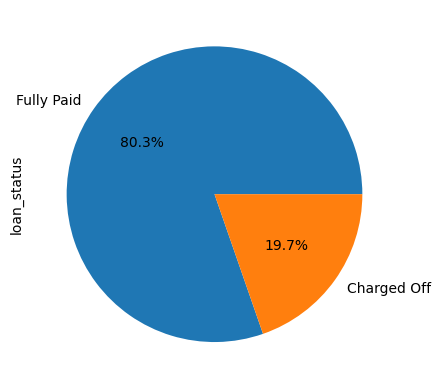

In [68]:
train['loan_status'].value_counts().plot.pie(autopct='%1.1f%%')

In [69]:
cat_cols=train.select_dtypes(exclude=np.number)
num_cols=train.select_dtypes(include=np.number)

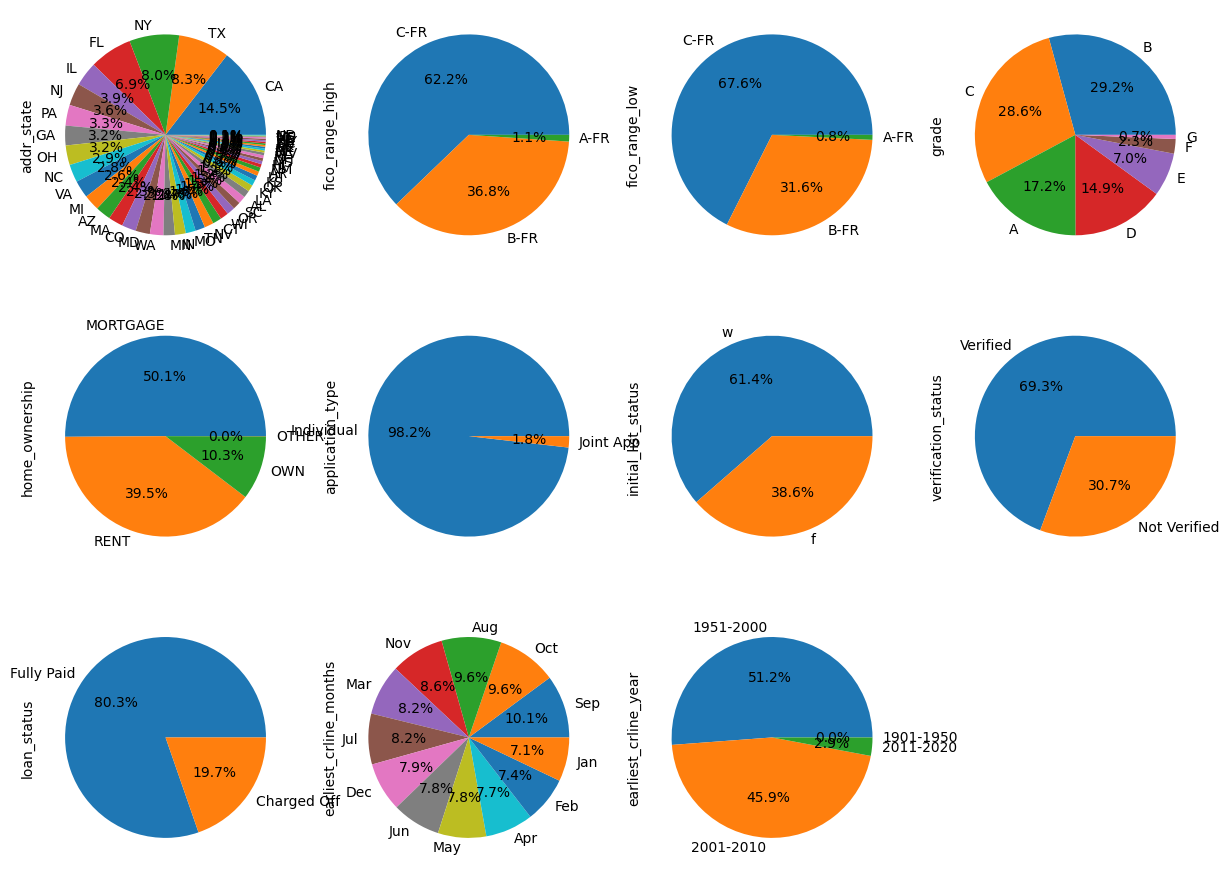

In [70]:
nrows=4
ncols=4
itr=1
plt.figure(figsize=(15,15))

for i in cat_cols:
  plt.subplot(nrows,ncols,itr)
  a=train[i].value_counts().plot.pie(autopct='%1.1f%%')
  itr+=1
plt.show()

<Axes: ylabel='count'>

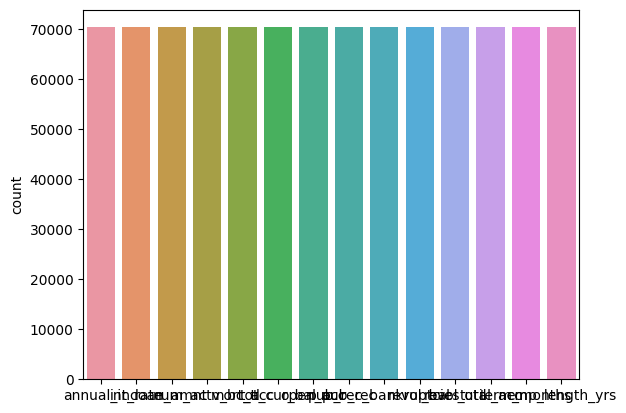

In [71]:
sns.countplot(num_cols)

In [72]:
train.columns

Index(['addr_state', 'annual_inc', 'fico_range_high', 'fico_range_low',
       'grade', 'home_ownership', 'application_type', 'initial_list_status',
       'int_rate', 'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal',
       'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal',
       'revol_util', 'total_acc', 'verification_status', 'loan_status',
       'earliest_crline_months', 'earliest_crline_year', 'term_months',
       'emp_length_yrs'],
      dtype='object')

In [73]:
train.isna().sum()

addr_state                0
annual_inc                0
fico_range_high           0
fico_range_low            0
grade                     0
home_ownership            0
application_type          0
initial_list_status       0
int_rate                  0
loan_amnt                 0
num_actv_bc_tl            0
mort_acc                  0
tot_cur_bal               0
open_acc                  0
pub_rec                   0
pub_rec_bankruptcies      0
revol_bal                 0
revol_util                0
total_acc                 0
verification_status       0
loan_status               0
earliest_crline_months    0
earliest_crline_year      0
term_months               0
emp_length_yrs            0
dtype: int64

In [74]:
class CustomTranformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X,y = None):
        return self
    def transform(self, X, y = None):
        return X


In [75]:
categ_process = Pipeline([
          ('onehot', OneHotEncoder(handle_unknown='ignore'))
         ])

num_process = Pipeline([('scale', MinMaxScaler())])

In [76]:
num_cols.columns,cat_cols.columns

(Index(['annual_inc', 'int_rate', 'loan_amnt', 'num_actv_bc_tl', 'mort_acc',
        'tot_cur_bal', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies',
        'revol_bal', 'revol_util', 'total_acc', 'term_months',
        'emp_length_yrs'],
       dtype='object'),
 Index(['addr_state', 'fico_range_high', 'fico_range_low', 'grade',
        'home_ownership', 'application_type', 'initial_list_status',
        'verification_status', 'loan_status', 'earliest_crline_months',
        'earliest_crline_year'],
       dtype='object'))

In [77]:
full_preprocess = ColumnTransformer(
    transformers=
    [
    ('numerical_processing',num_process,['annual_inc', 'int_rate',
        'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
        'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util',
        'total_acc', 'term_months', 'emp_length_yrs']),
    ('categorical_processing',categ_process,['addr_state', 'grade', 'home_ownership','fico_range_high', 'fico_range_low',
        'application_type', 'initial_list_status',
        'verification_status', 'earliest_crline_months',
        'earliest_crline_year'])

    ]
)

In [78]:
pipe_logistic = Pipeline([
         ('preprocess',full_preprocess),
         ('model',LogisticRegression())])

In [79]:
train['loan_status']=train['loan_status'].replace({'Charged Off':0,'Fully Paid':1})
train['loan_status']

0        0
1        1
2        1
3        1
4        1
        ..
79995    0
79996    1
79997    1
79998    1
79999    1
Name: loan_status, Length: 70375, dtype: int64

In [80]:
X=train.drop(columns=['loan_status'])
y=train['loan_status']

In [81]:
pipe_logistic.fit(X,y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical_processing',
                                                  Pipeline(steps=[('scale',
                                                                   MinMaxScaler())]),
                                                  ['annual_inc', 'int_rate',
                                                   'loan_amnt',
                                                   'num_actv_bc_tl', 'mort_acc',
                                                   'tot_cur_bal', 'open_acc',
                                                   'pub_rec',
                                                   'pub_rec_bankruptcies',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc', 'term_months',
                                                   'emp_length_yrs']),
                                                 ('categorical_processing',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['addr_state', 'grade',
                                                   'home_ownership',
                                                   'fico_range_high',
                                                   'fico_range_low',
                                                   'application_type',
                                                   'initial_list_status',
                                                   'verification_status',
                                                   'earliest_crline_months',
                                                   'earliest_crline_year'])])),
                ('model', LogisticRegression())])

In [82]:
set_config(display='diagram')
display(pipe_logistic)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical_processing',
                                                  Pipeline(steps=[('scale',
                                                                   MinMaxScaler())]),
                                                  ['annual_inc', 'int_rate',
                                                   'loan_amnt',
                                                   'num_actv_bc_tl', 'mort_acc',
                                                   'tot_cur_bal', 'open_acc',
                                                   'pub_rec',
                                                   'pub_rec_bankruptcies',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc', 'term_months',
                                                   'emp_length_yrs']),
                                                 ('categorical_processing',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['addr_state', 'grade',
                                                   'home_ownership',
                                                   'fico_range_high',
                                                   'fico_range_low',
                                                   'application_type',
                                                   'initial_list_status',
                                                   'verification_status',
                                                   'earliest_crline_months',
                                                   'earliest_crline_year'])])),
                ('model', LogisticRegression())])

In [83]:
pipe_logistic.predict(X)

array([1, 1, 1, ..., 1, 1, 1])

In [84]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=42)
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((56300, 24), (14075, 24), (56300,), (14075,))

In [85]:
test_X.value_counts(),test_y.value_counts()

(addr_state  annual_inc  fico_range_high  fico_range_low  grade  home_ownership  application_type  initial_list_status  int_rate  loan_amnt  num_actv_bc_tl  mort_acc  tot_cur_bal  open_acc  pub_rec  pub_rec_bankruptcies  revol_bal  revol_util  total_acc  verification_status  earliest_crline_months  earliest_crline_year  term_months  emp_length_yrs
 AK          20000.0     C-FR             C-FR            C      MORTGAGE        Individual        w                    12.39     5000.0     3               1         76470        6         1        1                     6724.0     93.4        12         Verified             May                     2001-2010             36           4                 1
 NY          59000.0     C-FR             C-FR            D      RENT            Individual        f                    17.86     13500.0    1               6         13374        10        0        0                     6705.0     28.8        30         Verified             Oct                

In [86]:
pipe_logistic.fit(train_X,train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical_processing',
                                                  Pipeline(steps=[('scale',
                                                                   MinMaxScaler())]),
                                                  ['annual_inc', 'int_rate',
                                                   'loan_amnt',
                                                   'num_actv_bc_tl', 'mort_acc',
                                                   'tot_cur_bal', 'open_acc',
                                                   'pub_rec',
                                                   'pub_rec_bankruptcies',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc', 'term_months',
                                                   'emp_length_yrs']),
                                                 ('categorical_processing',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['addr_state', 'grade',
                                                   'home_ownership',
                                                   'fico_range_high',
                                                   'fico_range_low',
                                                   'application_type',
                                                   'initial_list_status',
                                                   'verification_status',
                                                   'earliest_crline_months',
                                                   'earliest_crline_year'])])),
                ('model', LogisticRegression())])

In [87]:
pred_val_y=pipe_logistic.predict(test_X)
print('log loss:',log_loss(test_y,pred_val_y))
print('val confusion matrix:\n', confusion_matrix(test_y,pred_val_y))
print('val class report:\n', classification_report(test_y,pred_val_y))

log loss: 7.280433860409241
val confusion matrix:
 [[  130  2711]
 [  132 11102]]
val class report:
               precision    recall  f1-score   support

           0       0.50      0.05      0.08      2841
           1       0.80      0.99      0.89     11234

    accuracy                           0.80     14075
   macro avg       0.65      0.52      0.49     14075
weighted avg       0.74      0.80      0.72     14075



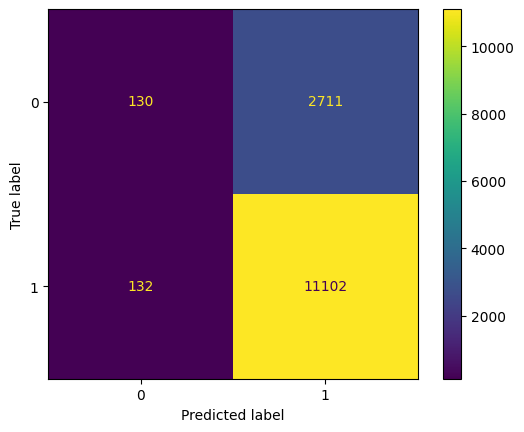

In [88]:
ConfusionMatrixDisplay.from_predictions(test_y,pred_val_y)

TPR = TP/(TP+FN)
Recall = True positive rate

In [89]:
P=0.80
R=0.99

F1score=2*P*R/(P+R)
print('F1score for the test:',F1score)

F1score for the test: 0.8849162011173185


In [90]:
pred_val_Y=pipe_logistic.predict(train_X)
print('log loss:',log_loss(train_y,pred_val_Y))
print('val confusion matrix:\n', confusion_matrix(train_y,pred_val_Y))
print('val class report:\n', classification_report(train_y,pred_val_Y))

log loss: 7.033313963283144
val confusion matrix:
 [[  558 10449]
 [  537 44756]]
val class report:
               precision    recall  f1-score   support

           0       0.51      0.05      0.09     11007
           1       0.81      0.99      0.89     45293

    accuracy                           0.80     56300
   macro avg       0.66      0.52      0.49     56300
weighted avg       0.75      0.80      0.73     56300



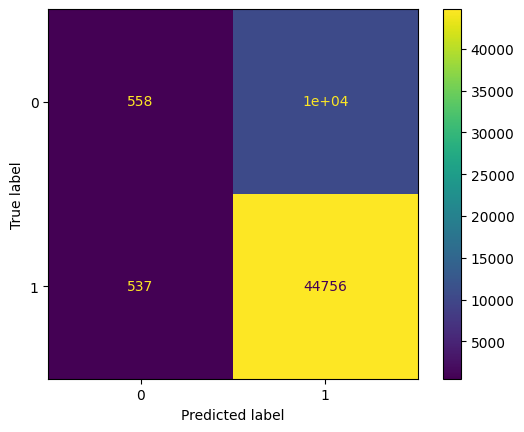

In [91]:
ConfusionMatrixDisplay.from_predictions(train_y,pred_val_Y)

In [92]:
P=0.81
R=0.99

F1score=2*P*R/(P+R)
print('F1score for the train:',F1score)

F1score for the train: 0.891


In [93]:
test_pred_proba = pipe_logistic.predict_proba(test_X)
train_pred_proba = pipe_logistic.predict_proba(train_X)[:,1]

Area under the Receiver Operating Characteristic curve: 0.7127806221996621


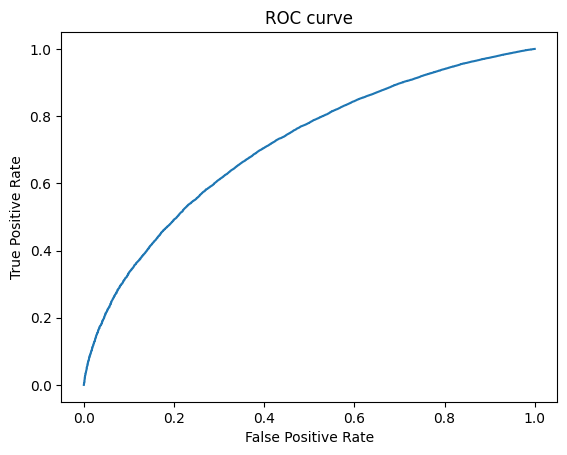

In [94]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y, pipe_logistic.predict_proba(X)[:,1])
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:',
      roc_auc_score(y, pipe_logistic.predict_proba(X)[:,1]))

In [95]:
pipe_model_poly = Pipeline([
    ('preprocess',full_preprocess),
    ('polynomial', PolynomialFeatures(degree=2)),
    ('model', LogisticRegression())
])

In [96]:
pipe_model_poly.fit(X,y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical_processing',
                                                  Pipeline(steps=[('scale',
                                                                   MinMaxScaler())]),
                                                  ['annual_inc', 'int_rate',
                                                   'loan_amnt',
                                                   'num_actv_bc_tl', 'mort_acc',
                                                   'tot_cur_bal', 'open_acc',
                                                   'pub_rec',
                                                   'pub_rec_bankruptcies',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc', 'term_months',
                                                   'emp_length_yrs']),
                                                 ('categorical_processing',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['addr_state', 'grade',
                                                   'home_ownership',
                                                   'fico_range_high',
                                                   'fico_range_low',
                                                   'application_type',
                                                   'initial_list_status',
                                                   'verification_status',
                                                   'earliest_crline_months',
                                                   'earliest_crline_year'])])),
                ('polynomial', PolynomialFeatures()),
                ('model', LogisticRegression())])

In [97]:
# multi model pipeline
pipe_lr=Pipeline(steps=[
    ('prep',full_preprocess),
    ('lr',LogisticRegression())
])
pipe_lr=Pipeline(steps=[
    ('prep',full_preprocess),
    ('lr',LogisticRegression())
])

pipe_dt=Pipeline(steps=[
    ('prep',full_preprocess),
    ('dt',DecisionTreeClassifier())
])

pipe_knn=Pipeline(steps=[
    ('prep',full_preprocess),
    ('knn',KNeighborsClassifier())
])

pipe_rf=Pipeline(steps=[
    ('prep',full_preprocess),
    ('rf',RandomForestClassifier())
])

In [98]:
grid_params_lr=[{'lr__penalty':['l2']}]
grid_params_dt=[{'dt__max_depth':[5,10]}]
grid_params_rf=[{'rf__max_depth':[5,10]}]
grid_params_knn=[{'knn__n_neighbors':[10,5]}]

In [99]:
gridscr_lr=GridSearchCV(pipe_lr,param_grid=grid_params_lr,scoring='neg_log_loss',cv=2)
gridscr_dt=GridSearchCV(pipe_dt,param_grid=grid_params_dt,scoring='neg_log_loss',cv=2)
gridscr_knn=GridSearchCV(pipe_knn,param_grid=grid_params_knn,scoring='neg_log_loss',cv=2)
gridscr_rf=GridSearchCV(pipe_rf,param_grid=grid_params_rf,scoring='neg_log_loss',cv=2)

In [ ]:
result_acc={}
models=[]
iter_mdl=[gridscr_lr,gridscr_dt,gridscr_knn,gridscr_rf]
mdl_idx={0:'Log_reg',1:'knn',2:'decisiontree',3:'RandomForest'}

for id,model in enumerate (iter_mdl):
  model.fit(train_X,train_y)
  print(model.best_params_)
  print(model.best_score_)
  models.append(model.best_estimator_)
  result_acc[id]=model.best_score_

{'lr__penalty': 'l2'}
-0.4502937438317909
{'dt__max_depth': 5}
-0.46399371542442536


In [ ]:
models

In [ ]:
result_acc

In [ ]:
pd.DataFrame(list(zip(mdl_idx.values(), result_acc.values())), columns=['Model','Accuracy'])